In [154]:
import pandas as pd
import numpy as np


import random

In [2]:
df =pd.read_csv('Sales_v1.csv')

In [3]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

.drop([...], axis=1): El método drop se utiliza para eliminar columnas o filas del DataFrame.
- El primer argumento es una lista de nombres de columnas que se desea eliminar.
- "Gross Sales", "Sales", "Profit", "Month Number", "Month Name", "Year": Estas son las columnas que se están eliminando.
- axis=1: Este parámetro indica que estamos eliminando columnas (si fuera axis=0, se eliminarían filas).

In [4]:
df = (
    df
    
    .drop( [ 
        "Gross Sales"
        , " Sales"
        , "Profit"
        , "Month Number"
        , "Month Name"
        , "Year"
    ] , axis = 1 )

    
)

In [5]:
df.head(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Discounts,COGS,Date
0,Government,Germany,Carretera,NaN,1513.0,$3,$350.,0.0,"$393,380.",1/12/14
1,Government,Germany,Paseo,NaN,1006.0,$10,$350.,0.0,"$261,560.",1/6/14


.replace('[$,]', '', regex=True): Este método se utiliza para reemplazar caracteres específicos en los valores del DataFrame.
- '[$,]': Esta es la expresión regular que define los caracteres que se desean reemplazar. En este caso, se están buscando los signos de dólar ($) y las comas (,).
- '': Este es el valor por el que se reemplazarán los caracteres encontrados. En este caso, se está reemplazando con una cadena vacía, es decir, se están eliminando los caracteres especificados.
- regex=True: Este parámetro indica que la primera cadena es una expresión regular.

In [6]:
cols = [
    'Manufacturing Price'
    , 'Sale Price'
    , 'COGS'
]

for c in cols:
    print(c)   
    df[c] = df[c].replace( '[$,]' , '' , regex=True  ).astype(float)

Manufacturing Price
Sale Price
COGS


	•	df['Date']: Selecciona la columna ‘Date’ del DataFrame df.
	•	pd.to_datetime(...): Esta función de pandas convierte una cadena de texto en un objeto de fecha y hora.
	•	df['Date']: Es la columna que se va a convertir.
	•	format='%d/%m/%y': Especifica el formato en el que se encuentran las fechas en la columna ‘Date’. En este caso:
	•	%d representa el día del mes con dos dígitos (01, 02, …, 31).
	•	%m representa el mes con dos dígitos (01, 02, …, 12).
	•	%y representa el año con dos dígitos (por ejemplo, 21 para el año 2021).
	•	El resultado es que la columna ‘Date’ del DataFrame df se convierte en un tipo de dato datetime.

In [7]:
df['Date'] = pd.to_datetime( df['Date'] , format='%d/%m/%y' )

	•	df['Year'] = df['Date'].dt.year:
	•	df['Date']: Selecciona la columna ‘Date’ del DataFrame df.
	•	.dt.year: Extrae el componente de año de los valores de fecha en la columna ‘Date’.
	•	df['Year']: Crea una nueva columna llamada ‘Year’ en el DataFrame df y le asigna los valores de año extraídos de la columna ‘Date’.
	•	df['Month'] = df['Date'].dt.month:
	•	df['Date']: Selecciona la columna ‘Date’ del DataFrame df.
	•	.dt.month: Extrae el componente de mes de los valores de fecha en la columna ‘Date’.

In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [24]:
df.head(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Discounts,COGS,Date,Year,Month
0,Government,Germany,Carretera,NaN,1513.0,3.0,350.0,0.0,393380.0,2014-12-01,2014,12
1,Government,Germany,Paseo,NaN,1006.0,10.0,350.0,0.0,261560.0,2014-06-01,2014,6


In [32]:
df[ 'Year' ].value_counts()

Year
2014    525
2013    175
Name: count, dtype: int64

	•	df.groupby([...], as_index=False): Agrupa los datos del DataFrame df según las columnas especificadas y cuenta los elementos en cada grupo.
	•	["Year", "Month"]: Especifica las columnas ‘Year’ y ‘Month’ por las cuales se agruparán los datos. Esto significa que se crearán grupos para cada combinación única de año y mes.
	•	as_index=False: Este parámetro indica que las columnas usadas para agrupar no se establecerán como índice del DataFrame resultante, manteniéndose como columnas normales.
	•	.count(): Cuenta el número de elementos en cada grupo. Esto se aplica a todas las columnas del DataFrame, devolviendo el número de elementos no nulos en cada grupo.

El resultado es un nuevo DataFrame en el que cada fila representa una combinación única de año y mes, y las columnas contienen el conteo de elementos para cada grupo. Esta operación es útil para resumir y analizar la cantidad de datos presentes en cada periodo de tiempo.

In [42]:
(

    df

    .groupby( 
        [
            "Year"
            , "Month"
        ]
        , as_index=False
    )

    .count()

    .head(2)
   
)

,Year,Month,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Discounts,COGS,Date
0,2013,9,35,35,35,32,35,35,35,35,35,35
1,2013,10,70,70,70,68,70,70,70,70,70,70


	•	df.groupby([...], as_index=False): Agrupa los datos del DataFrame df según las columnas especificadas y aplica una función de agregación a cada grupo.
	•	["Year", "Month"]: Especifica las columnas ‘Year’ y ‘Month’ por las cuales se agruparán los datos. Esto significa que se crearán grupos para cada combinación única de año y mes.
	•	as_index=False: Este parámetro indica que las columnas usadas para agrupar no se establecerán como índice del DataFrame resultante, manteniéndose como columnas normales.
	•	.agg({"Date": ["count"]}): Aplica una función de agregación al DataFrame agrupado.
	•	{"Date": ["count"]}: Especifica que se desea contar el número de valores en la columna ‘Date’ para cada grupo. La clave del diccionario es el nombre de la columna sobre la que se aplica la función, y el valor es una lista de las funciones de agregación a aplicar. En este caso, solo se aplica la función count.

In [46]:
aggYM = (

    df

    .groupby( 
        [
            "Year"
            , "Month"
        ]
        , as_index=False
    )

    .agg({
        "Date" : [ "count" ]
    })

)

	•	aggYM.columns: Selecciona el atributo columns del DataFrame aggYM. Este atributo es una lista que contiene los nombres de las columnas del DataFrame.
	•	= ['Year', 'Month', 'Count']: Asigna una nueva lista de nombres a las columnas del DataFrame aggYM. En este caso, se están renombrando las columnas para que sean más descriptivas:
	•	‘Year’: La primera columna, que representa el año.
	•	‘Month’: La segunda columna, que representa el mes.
	•	‘Count’: La tercera columna, que representa el conteo de valores en la columna ‘Date’ para cada combinación de año y mes.

 Esta limpieza de "nombre de columnas" en necesaria porque despues de hacer un groupby con un agg deja un multilevel de nombre de columnas, tal como lo explicamos en clases

In [254]:
aggYM.columns = [ 'Year' , 'Month' , 'Count' ]

In [244]:
aggYM.head()

,Year,Month,Count
0,2013,9,35
1,2013,10,70
2,2013,11,35
3,2013,12,35
4,2014,1,35


## Distribuciones y probabilidades

<Axes: >

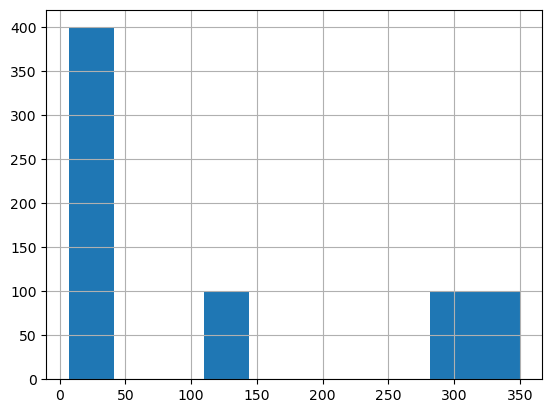

In [53]:
df["Sale Price"].hist()

	•	Ax = []: Inicializa una lista vacía llamada Ax.
	•	for i in range(1000):: Inicia un bucle que se ejecutará 1000 veces. La variable i tomará valores desde 0 hasta 999 en cada iteración del bucle.
	•	Ax.append(random.normalvariate(5, 12)):
	•	random.normalvariate(5, 12): Genera un número aleatorio siguiendo una distribución normal (también conocida como distribución gaussiana) con una media de 5 y una desviación estándar de 12.
	•	.append(...): Agrega el número generado al final de la lista Ax.

El resultado es una lista Ax que contiene 1000 números aleatorios generados a partir de una distribución normal con media 5 y desviación estándar 12. Esta operación es útil para simular datos que siguen una distribución específica, que es una práctica común en la teoría de la simulación.


In [69]:
Ax = []

for i in range(1000):
    Ax.append( random.normalvariate( 5 , 12 ) )

	•	pd.DataFrame(...): Crea un DataFrame de pandas.
	•	{'r': Ax}: Define un diccionario donde la clave es 'r' y el valor es la lista Ax. Esto significa que se crea una columna llamada 'r' en el DataFrame y sus valores son los elementos de la lista Ax.
	•	.boxplot(): Este método genera un diagrama de caja (box plot) para la columna 'r' del DataFrame.
	•	Un diagrama de caja es una representación gráfica de la distribución de datos basada en un resumen de cinco números: el mínimo, el primer cuartil (Q1), la mediana, el tercer cuartil (Q3) y el máximo. También puede mostrar valores atípicos (outliers).

<Axes: >

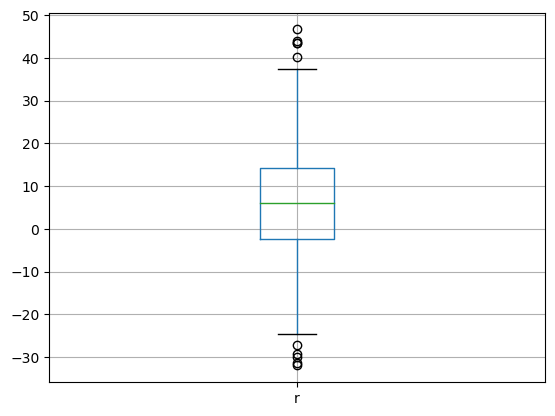

In [73]:
pd.DataFrame({
    'r':  Ax
}).boxplot()

Media: 1836.1246427279784
Desviación Estándar: 132.5148007435832
Mínimo: 1582.5722245207294
Máximo: 2042.5496576521361
Mediana: 1850.9200496174262


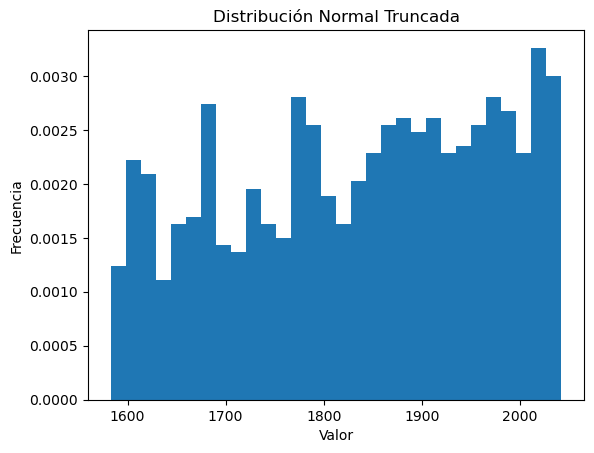

In [78]:
import numpy as np
from scipy.stats import truncnorm

def generate_truncated_normal_data(mean, std, min_val, max_val, size):
    # Calcular los parámetros de la distribución normal truncada
    a, b = (min_val - mean) / std, (max_val - mean) / std
    data = truncnorm(a, b, loc=mean, scale=std).rvs(size)
    return data

# Parámetros de ejemplo
mean = 2349
std = 605.884753
min_val = 1582.0
max_val = 2042.666667
size = 1000

# Generar datos
data = generate_truncated_normal_data(mean, std, min_val, max_val, size)

# Verificar estadísticas
print("Media:", np.mean(data))
print("Desviación Estándar:", np.std(data))
print("Mínimo:", np.min(data))
print("Máximo:", np.max(data))
print("Mediana:", np.median(data))

# Graficar datos
import matplotlib.pyplot as plt

plt.hist(data, bins=30, density=True)
plt.title('Distribución Normal Truncada')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

	•	n = 100: Define una variable n con el valor 100, que representa el número de muestras que se generarán.
	•	pd.DataFrame(...): Crea un DataFrame de pandas.
	•	{'role': np.random.choice(['Diputados', 'Cajeros'], size=n, p=[0.15, 0.85])}: Define un diccionario para crear una columna en el DataFrame:
	•	'role': Nombre de la columna.
	•	np.random.choice(['Diputados', 'Cajeros'], size=n, p=[0.15, 0.85]):
	•	np.random.choice(...): Genera una muestra aleatoria de elementos de la lista ['Diputados', 'Cajeros'].
	•	size=n: El tamaño de la muestra es n (en este caso, 100).
	•	p=[0.15, 0.85]: Define las probabilidades de selección para cada elemento en la lista. El 15% de las veces se seleccionará ‘Diputados’ y el 85% de las veces se seleccionará ‘Cajeros’.
	•	newCats['n'] = 1: Agrega una nueva columna llamada 'n' al DataFrame newCats y le asigna el valor 1 en todas las filas.

In [144]:
n = 100
newCats = pd.DataFrame({
    'role' : np.random.choice( [ 'Diputados' , 'Cajeros' ] , size=n , p = [ .15 , .85 ] ) 
})
newCats['n'] = 1 


	•	newCats.groupby(['role'], as_index=False): Agrupa los datos del DataFrame newCats según la columna 'role'.
	•	['role']: Especifica la columna por la cual se agruparán los datos. Esto significa que se crearán grupos para cada valor único en la columna 'role'.
	•	as_index=False: Indica que la columna usada para agrupar no se establecerá como índice del DataFrame resultante, manteniéndose como una columna normal.
	•	.agg({"n": ["count"]}): Aplica una función de agregación al DataFrame agrupado.
	•	{"n": ["count"]}: Especifica que se desea contar el número de valores en la columna 'n' para cada grupo. La clave del diccionario es el nombre de la columna sobre la que se aplica la función, y el valor es una lista de las funciones de agregación a aplicar. En este caso, solo se aplica la función count.

In [146]:
aggRoles = (
    newCats

    .groupby(['role'], as_index=False)
    .agg({
        "n": ["count"]
    })
)

In [148]:
aggRoles.columns = ['role', 'count']

	•	aggRoles['probs']: Crea una nueva columna llamada 'probs' en el DataFrame aggRoles.
	•	aggRoles['count'] / newCats.shape[0]: Calcula la probabilidad de cada rol dividiendo el conteo de cada rol (aggRoles['count']) por el número total de filas en el DataFrame newCats (newCats.shape[0]).
	•	aggRoles['count']: Selecciona la columna 'count' del DataFrame aggRoles, que contiene el número de ocurrencias de cada rol.
	•	newCats.shape[0]: Obtiene el número total de filas en el DataFrame newCats, lo que equivale a n, el tamaño de la muestra (en este caso, 100).

El resultado es una nueva columna 'probs' en el DataFrame aggRoles que contiene las probabilidades de cada rol (‘Diputados’ o ‘Cajeros’) en la muestra generada.

In [150]:
aggRoles['probs'] = aggRoles['count'] / newCats.shape[0]

In [152]:
aggRoles

,role,count,probs
0,Cajeros,86,0.86
1,Diputados,14,0.14


## regresemos a sales

	•	df.groupby([...], as_index=False): Agrupa los datos del DataFrame df según las columnas especificadas.
	•	["Segment", "Country", "Product"]: Especifica las columnas ‘Segment’, ‘Country’ y ‘Product’ por las cuales se agruparán los datos. Esto significa que se crearán grupos para cada combinación única de segmento, país y producto.
	•	# "Discount Band", "Month": Estas columnas están comentadas, por lo que no se utilizarán en el agrupamiento en este caso.
	•	as_index=False: Indica que las columnas usadas para agrupar no se establecerán como índice del DataFrame resultante, manteniéndose como columnas normales.
	•	.agg({"Date": ["count"]}): Aplica una función de agregación al DataFrame agrupado.
	•	{"Date": ["count"]}: Especifica que se desea contar el número de valores en la columna ‘Date’ para cada grupo. La clave del diccionario es el nombre de la columna sobre la que se aplica la función, y el valor es una lista de las funciones de agregación a aplicar. En este caso, solo se aplica la función count.

El resultado es un nuevo DataFrame firstAgg en el que cada fila representa una combinación única de segmento, país y producto, y la columna ‘Date’ contiene el conteo de valores para cada grupo.

In [190]:
firstAgg = (
    df

    .groupby( [
        "Segment"
        , "Country"
        , "Product"
        #, "Discount Band"
        #, "Month"
    ] , as_index=False )

    .agg({
        "Date": ["count"]
    })
)

In [192]:
firstAgg.columns = [        
        "Segment"
        , "Country"
        , "Product"
        #, "Discount Band"
        #, "Month"
        , "Count"
]

In [198]:
firstAgg['prob'] = firstAgg['Count'] / df.shape[0]

	•	firstAgg.index: Accede al atributo index del DataFrame firstAgg. El atributo index contiene los índices (o etiquetas) de las filas del DataFrame.

El resultado de esta celda será una visualización del índice del DataFrame firstAgg, que en este caso debería ser un rango de números enteros (0, 1, 2, …) debido a que se especificó as_index=False en la operación de agrupamiento. Esto significa que el índice es simplemente una enumeración de las filas en el DataFrame resultante.

In [204]:
firstAgg.index

RangeIndex(start=0, stop=150, step=1)

	•	np.random.choice(...): Genera una muestra aleatoria de valores a partir de una lista de opciones.
	•	firstAgg.index: Lista de índices del DataFrame firstAgg desde la cual se seleccionarán los valores. Estos índices representan las filas del DataFrame.
	•	size=10000: Tamaño de la muestra, es decir, se seleccionarán 10,000 valores.
	•	p=list(firstAgg['prob']): Lista de probabilidades asociadas a cada índice. La probabilidad de seleccionar cada índice está definida en la columna ‘prob’ del DataFrame firstAgg.

El resultado es una lista llamada randIndex que contiene 10,000 índices seleccionados aleatoriamente del DataFrame firstAgg según las probabilidades especificadas en la columna ‘prob’. Esta lista puede ser utilizada para realizar muestreos o simulaciones basadas en las distribuciones de los datos originales.

In [220]:
randIndex = np.random.choice( 
    firstAgg.index
    , size=10000 
    , p = list(firstAgg['prob'])
)

	•	firstAgg.loc[randIndex, ["Segment", "Country", "Product"]]:
	•	.loc[]: El método .loc[] se utiliza para seleccionar datos por etiquetas de índice.
	•	randIndex: La lista de índices seleccionados aleatoriamente.
	•	["Segment", "Country", "Product"]: Las columnas que se desean seleccionar del DataFrame firstAgg.
Esta parte del código selecciona las filas del DataFrame firstAgg cuyos índices están en randIndex, y solo incluye las columnas “Segment”, “Country” y “Product”.
	•	.loc[2]: Selecciona la fila con el índice 2 de la selección anterior.

El resultado es que esta celda devuelve los valores de las columnas “Segment”, “Country” y “Product” para la fila con el índice 2 dentro de las filas seleccionadas aleatoriamente del DataFrame firstAgg.

In [271]:
OneSegmnetCountryProduct = firstAgg.loc[ randIndex , ["Segment","Country","Product"] ].loc[2]

In [273]:
OneSegmnetCountryProduct

,Segment,Country,Product
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana
2,Channel Partners,Canada,Montana


### Tarea

Antes de explicar la tarea, vamos a entender que es lo que hemos hecho hasta el momento. primero observemos nuestro dataframe original exactamente para los valores Channel Partners, Canada, Montana

In [276]:
df.loc[ 
    ( df['Segment'] == 'Channel Partners' )
    &
    ( df['Country'] == 'Canada' )
    &
    ( df['Product'] == 'Montana' )
, : ]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Discounts,COGS,Date,Year,Month
304,Channel Partners,Canada,Montana,NaN,2518.0,5.0,12.0,0.00,7554.0,2014-06-01,2014,6
456,Channel Partners,Canada,Montana,Medium,2321.0,5.0,12.0,2506.68,6963.0,2014-11-01,2014,11


In [278]:
df.shape

(700, 12)

Como puede ver ese segmento que seleccionamos solamente tiene dos registros eso significa que ```2/700 = 0.0028 ``` de representatividad en ese dataset de 700 registros

lo que queremos hacer es simular ese dataset de 700 a uno de 10,000 por lo que OneSegmnetCountryProduct, es la representación de de ese grupo Channel Partners, Canada, Montana proyectado aleatoreamente. 

veamos cuantos registros hay en OneSegmentCountryProducts

In [284]:
OneSegmnetCountryProduct.shape

(35, 3)

si dividimos ese valor de registros entre 10000 tenderemos como resultado aproximadamente ``` 3/10000 = 0.0035 ``` muy cercano al valor representativo del dataset original. 

(recuerda que si lo corres todo de 0, como no tenemos una semilla los valores pueden variar ya que son aleatorios)

Ahora lo que ocupamos es que OneSegmnetCountryProduct se le agreguen los valores de las otras columnas

```python

["Units Sold","Manufacturing Price","Sale Price","Discounts","COGS"]

```

selecciona una de esas metricas y usando la funcion de normales truncadas trata de generar los valores aleatorios segun el resumen estadistico de la variable que seleccionaes. 

Por ejemplo si seleccionaste ```Units Sold``` vas a tener un dataframe de a columnas:

- segment
- country
- product
- Units Sold 
